In [1]:
from utils import *

### Last digit of the name in label data is the target label 

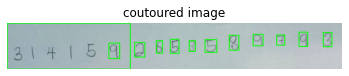

In [2]:
rel_dir = 'raw image'
filename = 'pi1.jpeg'

img = cv2.imread(f'{rel_dir}/{filename}')
digits = crop_number(img.copy(), True)

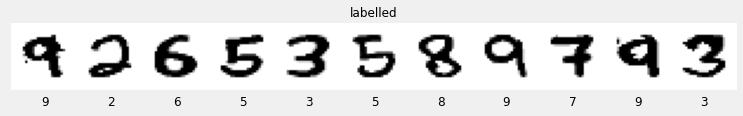

In [3]:
remaining_digits, labels = manual_label(digits)

In [5]:
save_label_digit(remaining_digits, labels)